## Import libraries

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Unpacking .pkl files

In [4]:
with open('train_image.pkl', 'rb') as f:
    X = pickle.load(f)

In [5]:
print(type(X))
print(len(X))

<class 'list'>
8000


In [6]:
with open('train_label.pkl', 'rb') as f:
    Y = pickle.load(f)

In [7]:
print(len(Y))
print(np.unique(Y, return_counts=True))

8000
(array([0, 2, 3, 6]), array([2000, 2000, 2000, 2000], dtype=int64))


In [13]:
#print(Y)

In [8]:
with open('test_image.pkl', 'rb') as f:
    XTest = pickle.load(f)

In [9]:
print(len(XTest))

2000


## Visualizing training data

In [10]:
def drawImage(img, label):
    plt.imshow(img.reshape(28,28))
    plt.axis('off')
    plt.title(label)
    plt.show()

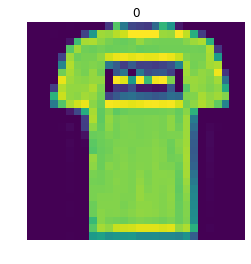

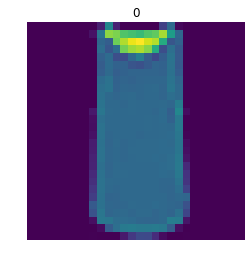

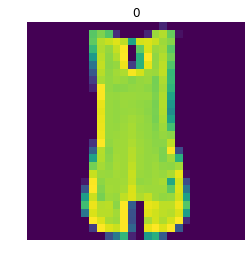

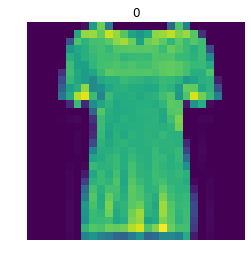

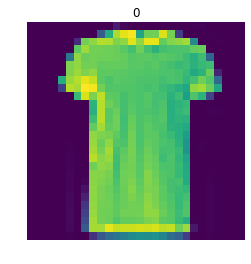

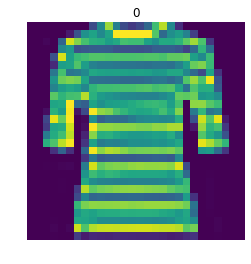

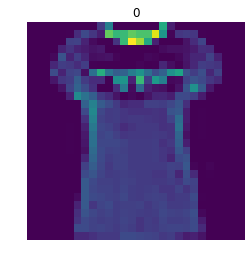

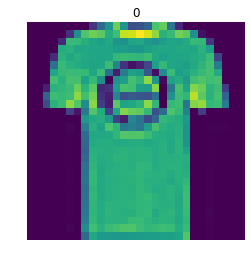

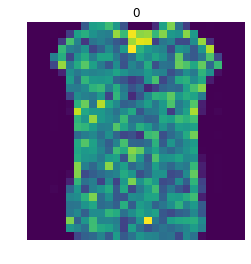

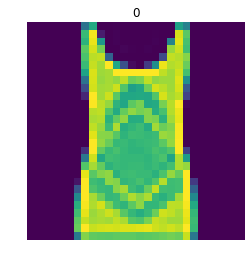

In [11]:
for i in range(10):
    drawImage(np.array(X[i]), Y[i])

## Classification Methods

* Naive Bayes
* Neural Networks
* SVM
* K nearest neighbours

### Convolutional Neural Networks

* AlexNet - https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf
* ZFNet - https://cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf
* GoogLeNet - https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf
* VGG Net - https://arxiv.org/pdf/1409.1556.pdf
* ResNet - https://arxiv.org/pdf/1512.03385.pdf